In [1]:
from pathlib import Path

from rljax.algorithm import DQN
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from classes import Env, Preprocess

PATH = Path().cwd()

In [2]:
raw = Preprocess(PATH.joinpath('asset_data', 'SH_SDS_data.csv'))
data = raw.process()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/cspa3/Desktop/Projects/CitiProject/PairsTradingRL/asset_data/SH_SDS_data.csv'

In [3]:
def return_rewards(current, last, action, p, c):
    return sum(current) - sum(last)

In [4]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 10000
SEED = 0
DAYS = 1
DAY = 2340

env = Env(data, no_trade_period=30, steps=DAY*DAYS, reward_func=return_rewards, max_position=1)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-2,
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=2000,
    seed=SEED,
)
trainer.train()

Num steps: 2000     Return: 84.0    Time: 0:00:46
Num steps: 4000     Return: 54.4    Time: 0:01:44
Num steps: 6000     Return: 44.2    Time: 0:02:37
Num steps: 8000     Return: 26.4    Time: 0:03:34
Num steps: 10000    Return: -33.3   Time: 0:04:24


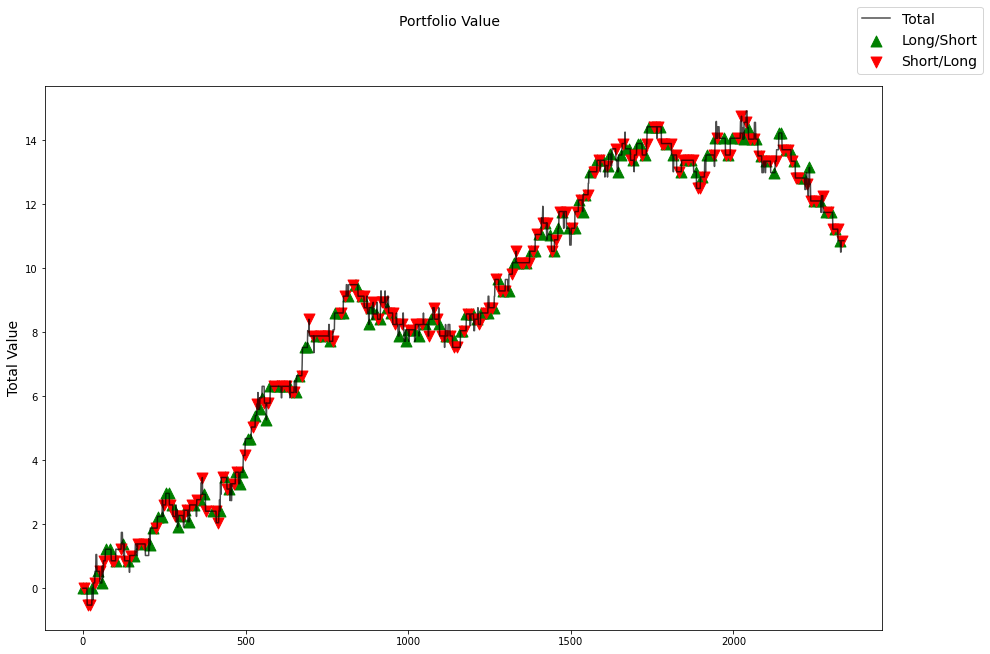

In [5]:
env.plot()

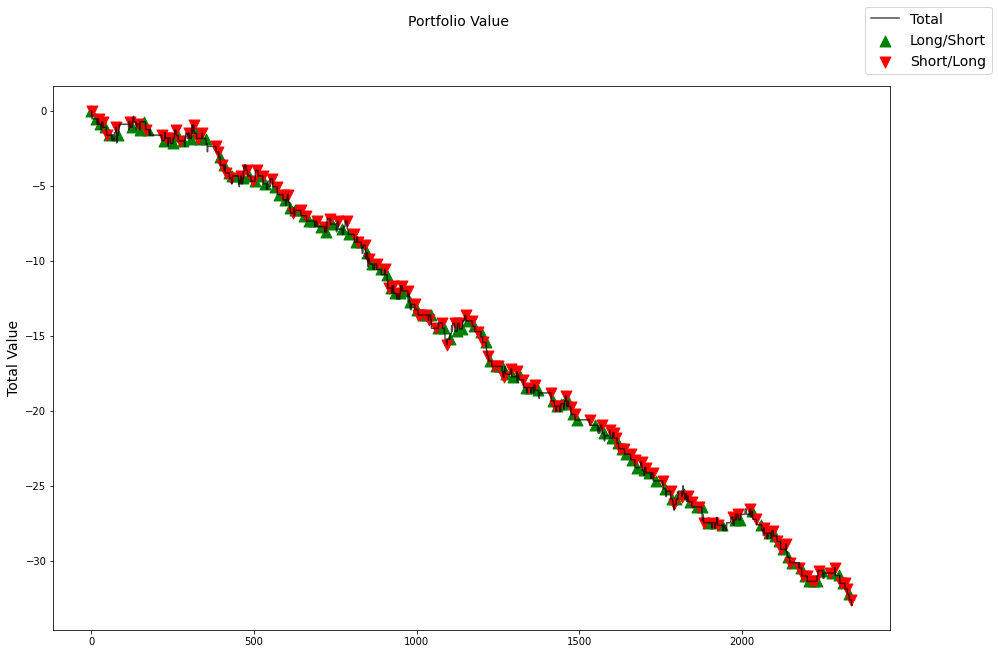

In [7]:
env_test.plot()

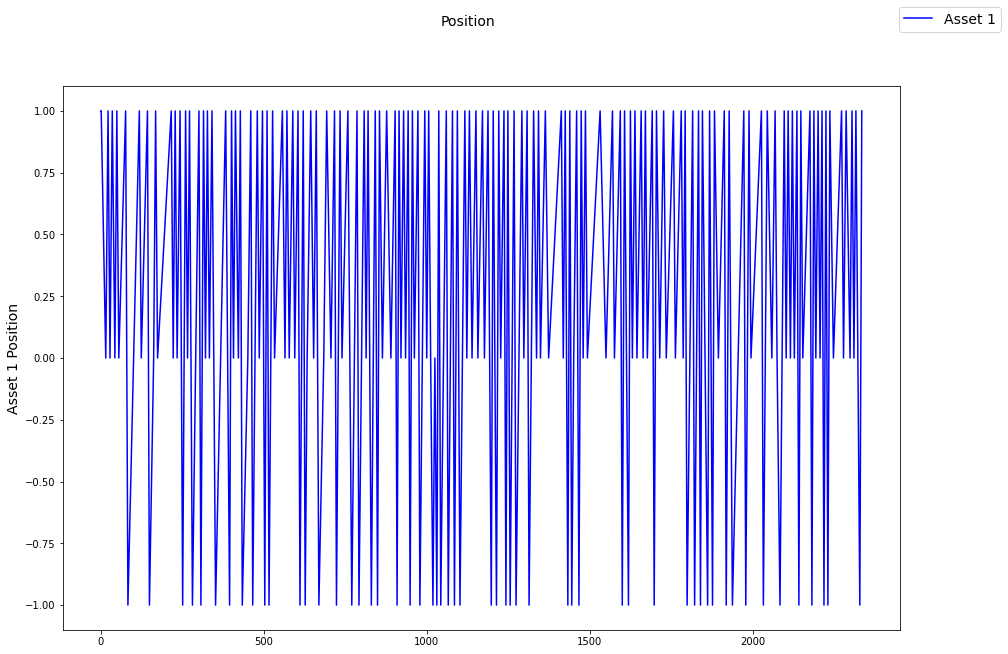

In [8]:
env_test.plot('position_history')

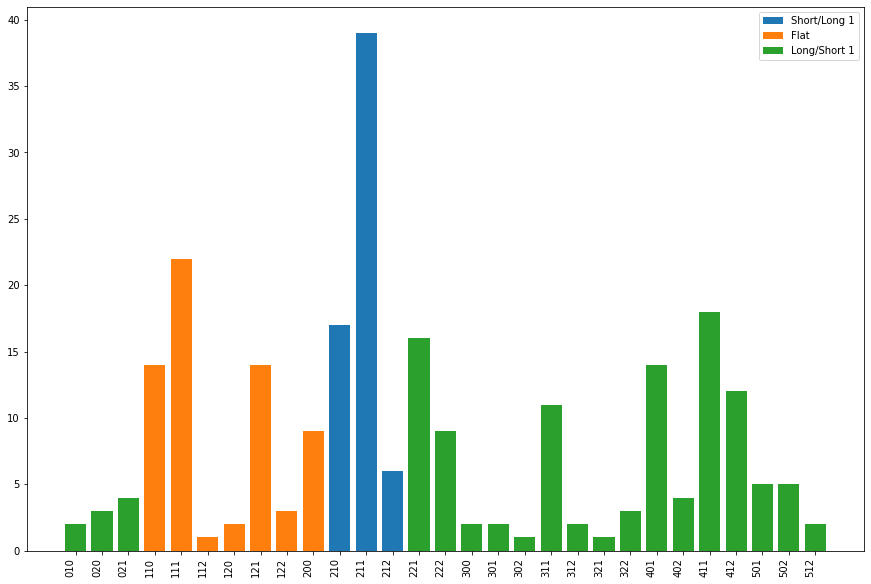

In [9]:
env_test.plot('summarize_decisions')

/mnt/c/Users/cspa3/Desktop/Projects/CitiProject/classes/env_history.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(self._portfolio_values_history)


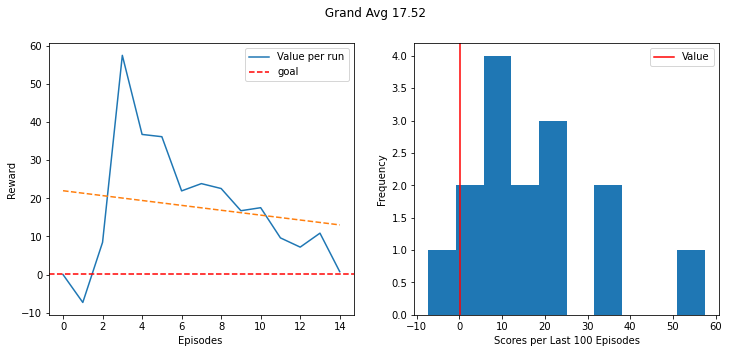

In [10]:
env.plot('learning_progress')